In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/Car Sale.csv")
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


1. Average Selling Price of Cars for Each Dealer

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

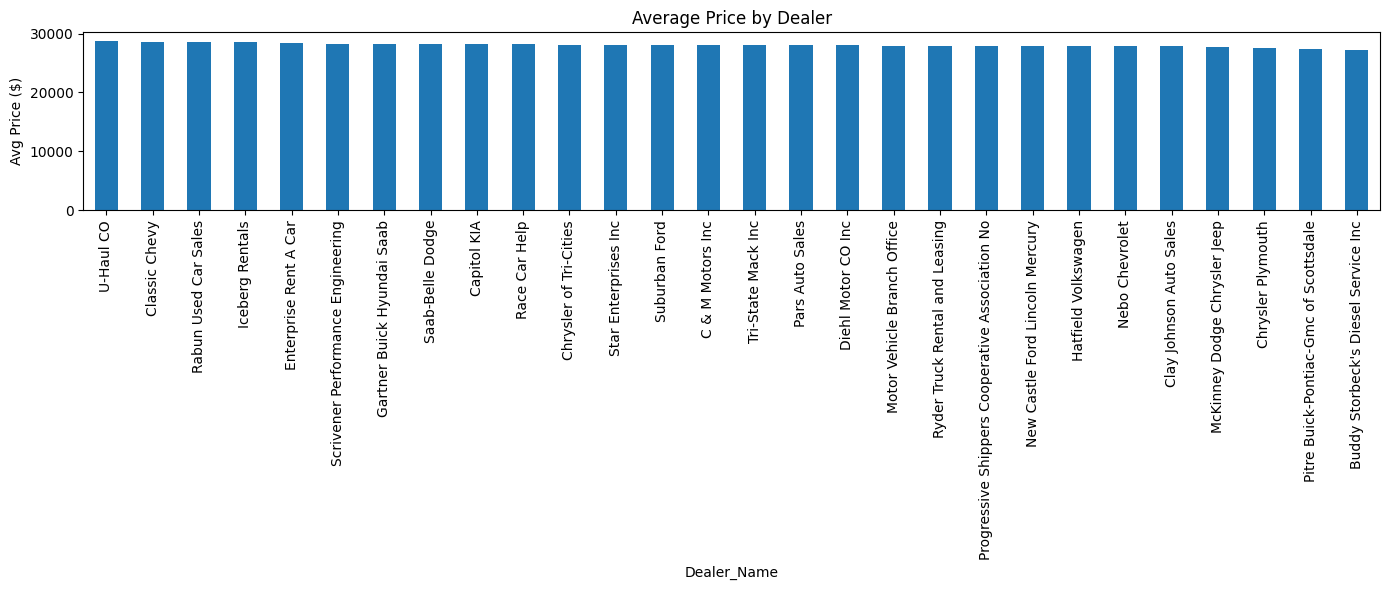

In [3]:
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(dealer_avg_price)
dealer_avg_price.plot(kind='bar', figsize=(14,6), title='Average Price by Dealer')
plt.ylabel('Avg Price ($)')
plt.tight_layout()
plt.show()


2. Car Brand with Highest Variation in Prices

In [4]:
brand_price_std = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(brand_price_std.head())

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


3.  Distribution of Car Prices by Transmission Type

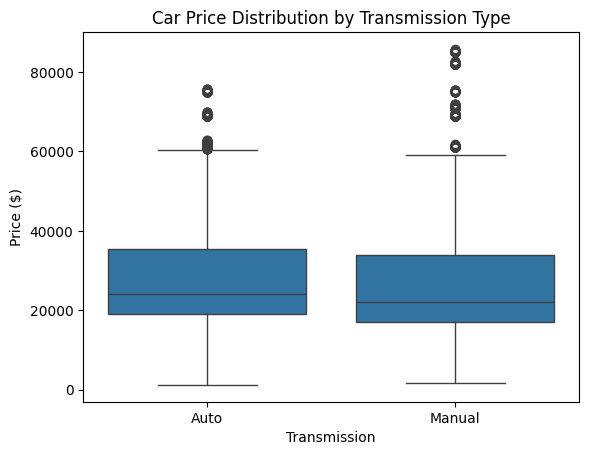

In [5]:
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Car Price Distribution by Transmission Type')
plt.show()

4. Distribution of Car Prices Across Regions

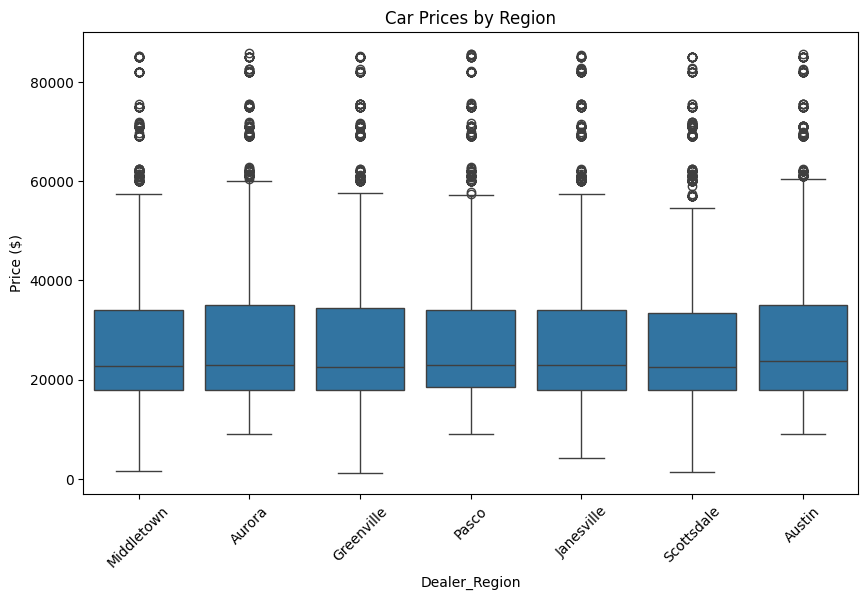

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title('Car Prices by Region')
plt.show()

 5. Distribution of Cars Based on Body Styles

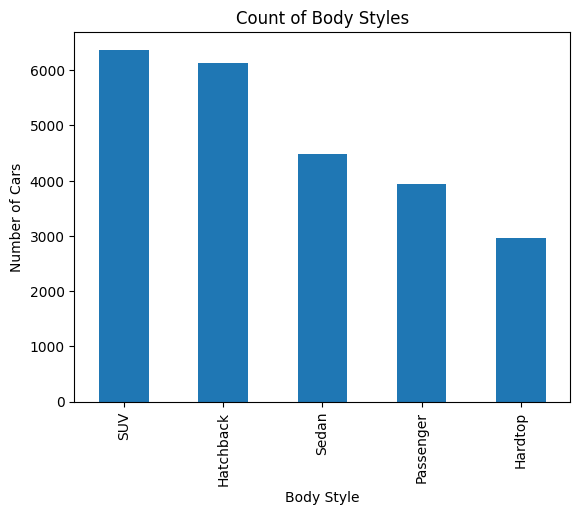

In [7]:
df['Body Style'].value_counts().plot(kind='bar', title='Count of Body Styles')
plt.ylabel('Number of Cars')
plt.show()

 6. Avg Selling Price by Customer Gender and Annual Income

In [8]:
pivot = df.pivot_table(index='Income_Bracket', columns='Gender', values='Price ($)', aggfunc='mean')
print(pivot)
pivot.plot(kind='bar', title='Average Price by Gender and Income Bracket')
plt.ylabel('Avg Price ($)')
plt.show()

KeyError: 'Income_Bracket'

7. Price & Count by Region

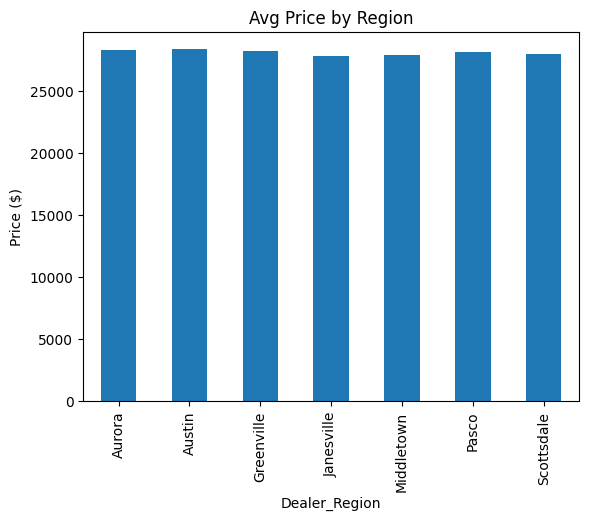

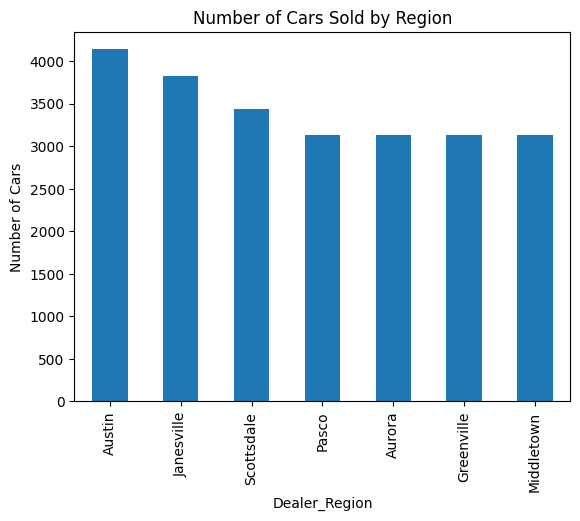

In [9]:
df.groupby('Dealer_Region')['Price ($)'].mean().plot(kind='bar', title='Avg Price by Region')
plt.ylabel('Price ($)')
plt.show()

# Count of cars
df['Dealer_Region'].value_counts().plot(kind='bar', title='Number of Cars Sold by Region')
plt.ylabel('Number of Cars')
plt.show()

8. Avg Car Price by Engine Size

In [10]:
df.groupby('Engine_Clean')['Price ($)'].mean().plot(title='Avg Price by Engine Size')
plt.ylabel('Price ($)')
plt.xlabel('Engine Size (L)')
plt.show()

KeyError: 'Engine_Clean'

9. Car Prices by Income Bracket

In [14]:
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)
plt.title('Price Distribution by Income Bracket')
plt.show()

ValueError: Could not interpret value `Income_Bracket` for `x`. An entry with this name does not appear in `data`.

10  What are the top 5 car models with the highest number of sales, and how does their price distribution look


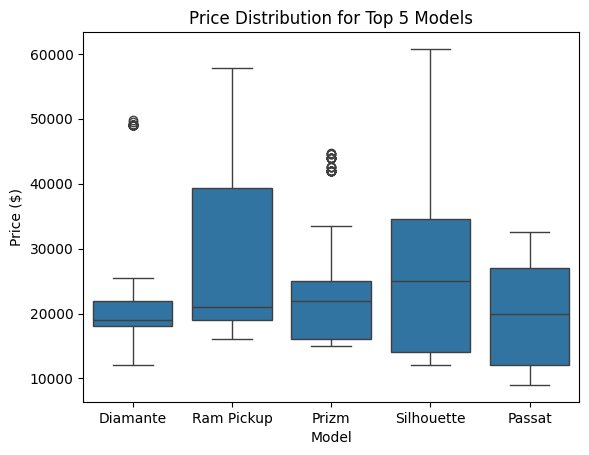

In [15]:
top_models = df['Model'].value_counts().head(5).index
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])
plt.title('Price Distribution for Top 5 Models')
plt.show()


11.How does car price vary with engine size across different car colors, and which colors have the highest price
variation


In [16]:
color_std = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(color_std.head())

# Heatmap
pivot_color_engine = df.pivot_table(index='Color', columns='Engine_Clean', values='Price ($)')
sns.heatmap(pivot_color_engine, cmap='coolwarm')
plt.title('Avg Price by Color and Engine Size')
plt.show()


Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


KeyError: 'Engine_Clean'

12 Is there any seasonal trend in car sales based on the date of sale


In [24]:
import datetime as dt
df['Month'] = df['Date'].dt.month
df['Month'].value_counts().sort_index().plot(kind='bar', title='Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Cars Sold')
plt.show()


AttributeError: Can only use .dt accessor with datetimelike values

13. How does the car price distribution change when considering different combinations of body style and
transmission type


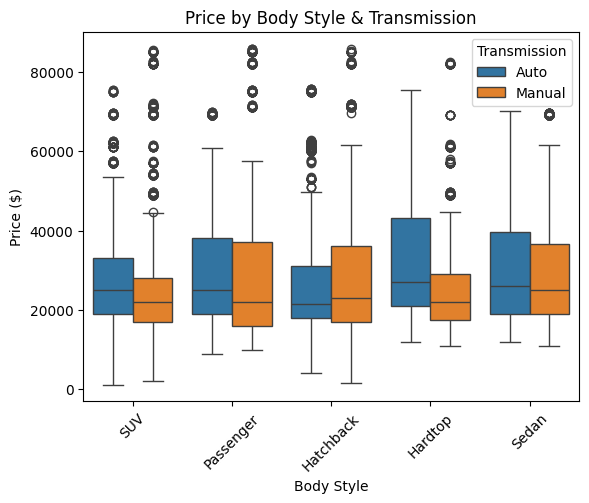

In [18]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price by Body Style & Transmission')
plt.xticks(rotation=45)
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact


In [22]:
sns.heatmap(df[['Price ($)', 'Engine', 'Annual Income']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'DoubleÂ\xa0Overhead Camshaft'

15 How does the average car price vary across different car models and engine types?

In [20]:
model_engine_avg = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(model_engine_avg.sort_values(by='Price ($)', ascending=False).head())


      Model                     Engine     Price ($)
212      SC          Overhead Camshaft  61074.818182
198  Ranger  DoubleÂ Overhead Camshaft  61064.055556
222   Sable          Overhead Camshaft  61039.770833
56   Catera  DoubleÂ Overhead Camshaft  56836.933333
143   LX470          Overhead Camshaft  54037.490196
